### 一、导入必要环境

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# 忽略警告
import warnings  
warnings.filterwarnings('ignore')

### 二、加载数据集、可视化

In [68]:
# 加载数据集
data = "../data/iris_train.csv"
# 不加载第0列，第0列为编号
iris_data = pd.read_csv(data,usecols=[1, 2, 3, 4, 5])

# 处理缺失值
iris_data = iris_data.dropna()
iris_data.head()
# 数据集分别为花萼长度、花萼宽度、花瓣长度、花瓣宽度、种类

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.5,3.5,1.3,0.2,setosa
1,6.1,2.9,4.7,1.4,versicolor
2,5.2,2.7,3.9,1.4,versicolor
3,6.9,3.2,5.7,2.3,virginica
4,4.9,3.6,1.4,0.1,setosa


#### 探索数据，可视化数据集

In [69]:
## 查看数据的摘要信息
iris_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,120.000000,120.000000,120.000000,120.000000
mean,5.860833,3.080000,3.777500,1.215833
std,0.815841,0.453854,1.779503,0.769371
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.400000,1.350000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sepal.Length       Axes(0.125,0.53;0.352273x0.35)
Sepal.Width     Axes(0.547727,0.53;0.352273x0.35)
Petal.Length       Axes(0.125,0.11;0.352273x0.35)
Petal.Width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

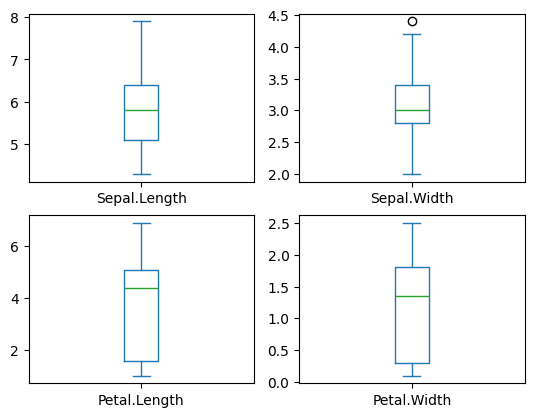

In [70]:
## 查看数据的箱线图，包括：上下界，上下四分位数和中位数，可以简单的查看数据的分布情况
iris_data.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)

array([[<Axes: title={'center': 'Sepal.Length'}>,
        <Axes: title={'center': 'Sepal.Width'}>],
       [<Axes: title={'center': 'Petal.Length'}>,
        <Axes: title={'center': 'Petal.Width'}>]], dtype=object)

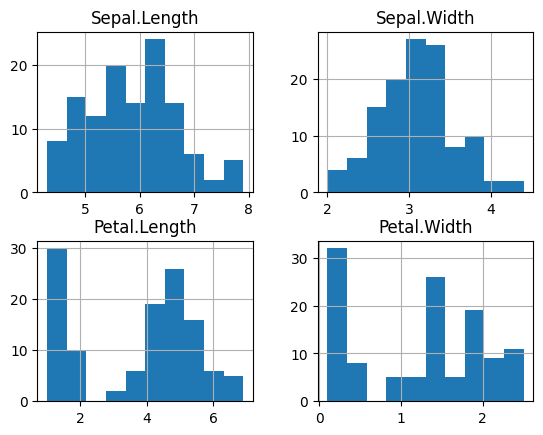

In [71]:
## 直方图，反馈的是数据的频度
iris_data.hist()

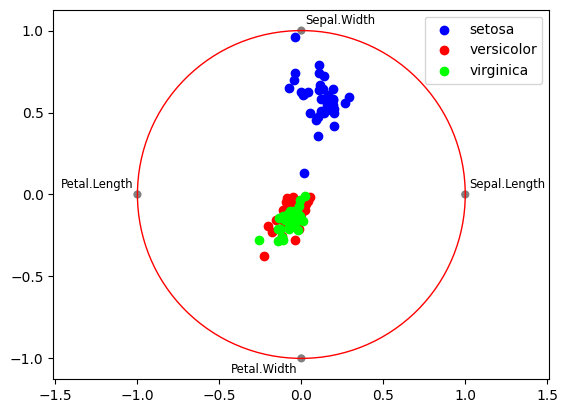

In [72]:
## 径向可视化，多维数据降维的可视化方法，有效的减少复杂度
ax = pd.plotting.radviz(iris_data, 'Species', colormap='brg')
ax.add_artist(plt.Circle((0,0), 1, color='r', fill = False))

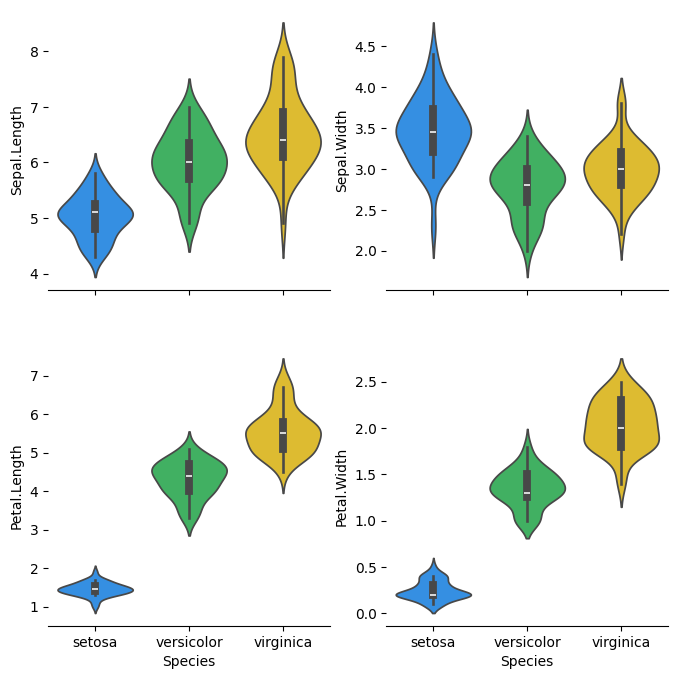

In [73]:
## 分别从数据分布和斜率，观察各特征与品种之间的关系

# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 

# 绘制  Violinplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.violinplot(x='Species', y='Sepal.Length', data=iris_data, palette=antV, ax=axes[(0, 0)])
sns.violinplot(x='Species', y='Sepal.Width', data=iris_data, palette=antV, ax=axes[(0, 1)])
sns.violinplot(x='Species', y='Petal.Length', data=iris_data, palette=antV, ax=axes[(1, 0)])
sns.violinplot(x='Species', y='Petal.Width', data=iris_data, palette=antV, ax=axes[(1, 1)])

plt.show()

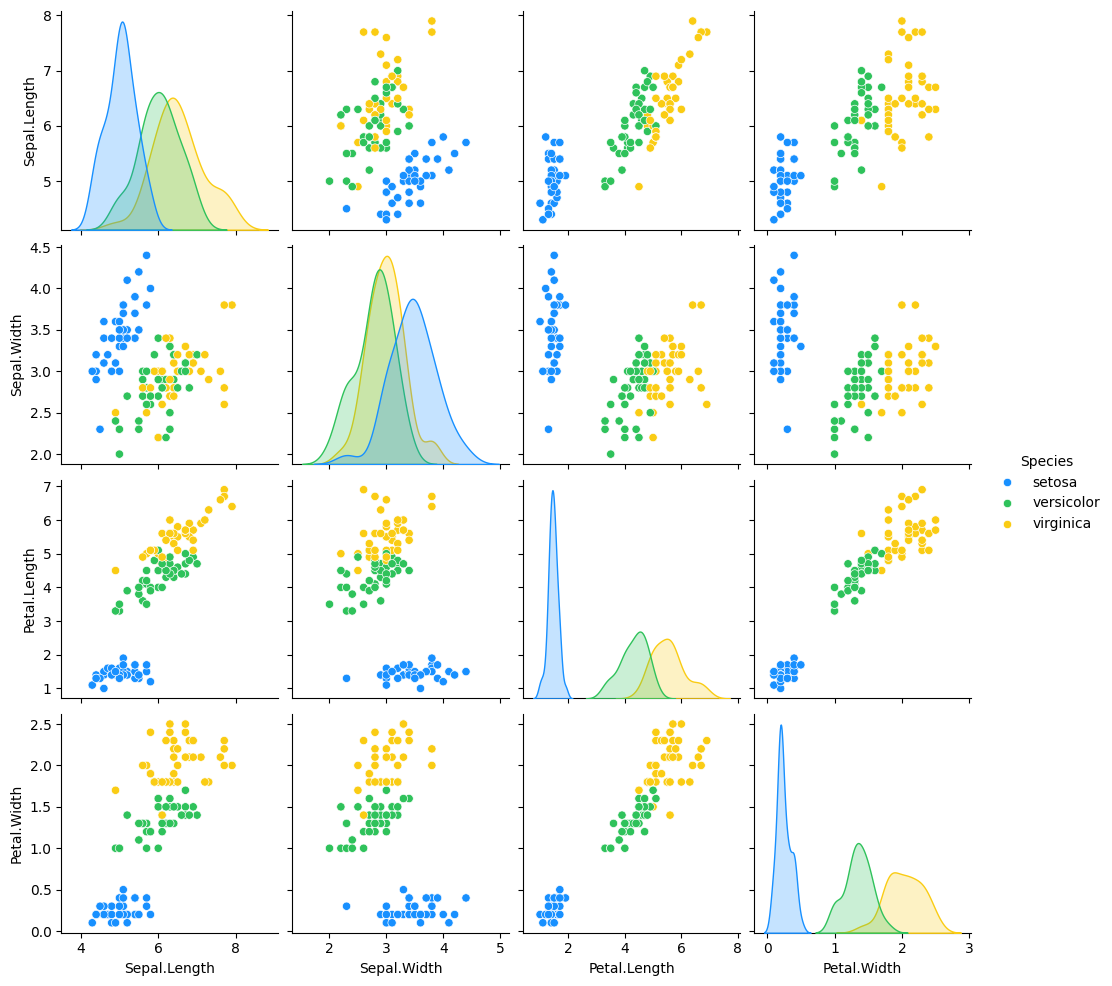

In [74]:
##  生成各特征之间关系的矩阵图
g = sns.pairplot(data=iris_data, palette=antV, hue= 'Species')

### 三、模型训练

In [75]:
# 将类别标签转换为数值型  
iris_data['Species'] = iris_data['Species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})  


# 分割特征和标签  
X = iris_data.iloc[:, :-1]  # 特征  
y = iris_data['Species']    # 标签  


# 将数据集分为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化特征  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

In [76]:
# 创建和训练SVM模型  
model = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=25)  
model.fit(X_train, y_train)  

# 预测  
y_pred = model.predict(X_test)

# 评估模型  
train_accuracy = model.score(X_train, y_train)  
print(f'训练集准确率: {train_accuracy}')   

训练集准确率: 0.9880952380952381


### 四、模型预测与评估

In [79]:
# 模型推理
# 加载验证数据集（假设验证数据集文件名为 iris_val.csv）
val_df = pd.read_csv('../data/iris_test.csv',usecols=[1, 2, 3, 4, 5])

# 数据清洗：检查缺失值和异常值
val_df_cleaned = val_df.dropna()  # 删除缺失值

# 特征选择：选择所有特征
X_val = val_df_cleaned.drop(columns=['Species'])

# 数据标准化/归一化
X_val_scaled = scaler.transform(X_val)

# 模型推理
y_pred = model.predict(X_val_scaled)

# 将数值标签映射回原始类别标签  
label_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}  
y_pred_labels = pd.Series(y_pred).map(label_mapping)  

In [80]:
# 保存推理结果
results = pd.DataFrame({'Sample_ID': range(len(y_pred)), 'Predicted_Species': y_pred_labels})
results.to_csv('./test_data_predictions.csv', index=False)

> 真实竞赛中会根据模型准确率评分，所以提供的推理数据不会包含标签列验证,您竞赛中不需要完成下面步骤

In [81]:
# 打印分类报告  

val_df_cleaned['pred']=y_pred_labels
val_df_cleaned[['Species','pred']]
# 提取验证集的真实标签和预测结果
y_true = val_df_cleaned['Species']
y_pred = val_df_cleaned['pred']
# 评估模型
accuracy = accuracy_score(y_true, y_pred)
print(f"模型准确率: {accuracy:.2f}")
print("分类报告:")
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_true, y_pred,target_names=target_names))

模型准确率: 0.97
分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

